In [1]:
#import packages
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#read in xlsx
df = pd.read_excel('England_Premier-League_2022-2023_Liverpool_vs_Arsenal.xlsx')

df

,minute,second,h_a,x,y,type,outcomeType,playerName,endX,endY,Setpiece,xT,shirtNo,position,team,country,competition,season
0,0,0.0,a,50.0,50.0,Pass,Successful,Granit Xhaka,37.0,49.4,0.0,-0.003329,34,MC,Arsenal,England,Premier-League,2022-2023
1,0,3.0,a,36.7,51.5,Pass,Successful,Oleksandr Zinchenko,36.0,77.9,0.0,-0.000492,35,DL,Arsenal,England,Premier-League,2022-2023
2,0,4.0,a,36.0,77.9,carry,Successful,Gabriel Magalhães,36.5,81.0,NaN,-0.000040,6,DC,Arsenal,England,Premier-League,2022-2023
3,0,5.0,a,36.5,81.0,Pass,Successful,Gabriel Magalhães,51.6,98.3,0.0,0.002081,6,DC,Arsenal,England,Premier-League,2022-2023
4,0,6.5,a,51.6,98.3,carry,Successful,Gabriel Martinelli,45.1,96.3,NaN,-0.001674,11,FWL,Arsenal,England,Premier-League,2022-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,95,54.0,a,68.1,82.4,Pass,Unsuccessful,Granit Xhaka,69.2,100.0,0.0,NaN,34,MC,Arsenal,England,Premier-League,2022-2023
1830,12,NaN,a,86.4,93.2,OffsideGiven,Unsuccessful,Gabriel Jesus,NaN,NaN,0.0,NaN,9,FW,Arsenal,England,Premier-League,2022-2023
1831,14,NaN,h,70.5,4.8,OffsideGiven,Unsuccessful,Jordan Henderson,NaN,NaN,0.0,NaN,14,MC,Liverpool,England,Premier-League,2022-2023
1832,37,NaN,a,72.0,5.3,OffsideGiven,Unsuccessful,Bukayo Saka,NaN,NaN,0.0,NaN,7,FWR,Arsenal,England,Premier-League,2022-2023


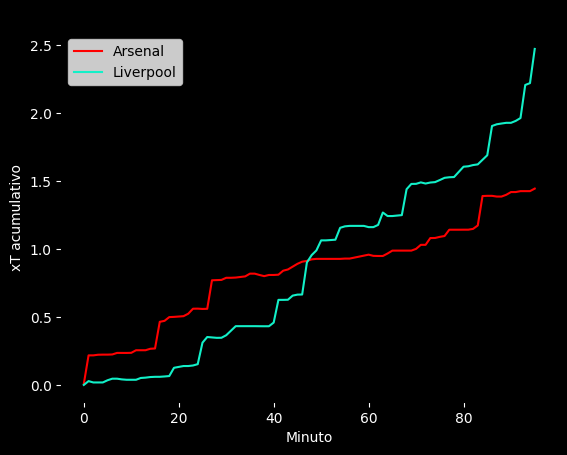

In [5]:
# Agrupar por equipo y minuto y sumar los valores de xT
df_grouped = df.groupby(["team", "minute"])["xT"].sum().reset_index()

# Calcular la suma acumulativa de xT para cada equipo
df_grouped["cumulative_xT"] = df_grouped.groupby("team")["xT"].cumsum()

# Crear un gráfico de líneas del xT acumulativo para cada equipo con colores personalizados
arsenal_color = "red"
liverpool = "#12F0C8"
fig, ax = plt.subplots()
for team in df_grouped["team"].unique():
    df_team = df_grouped[df_grouped["team"] == team]
    if team == "Arsenal":
        ax.plot(df_team["minute"], df_team["cumulative_xT"], label=team, color=arsenal_color)
    elif team == "Liverpool":
        ax.plot(df_team["minute"], df_team["cumulative_xT"], label=team, color=liverpool)

# Configurar el gráfico
plt.title("xT acumulativo por minuto")
plt.xlabel("Minuto")
plt.ylabel("xT acumulativo")
plt.legend()

# Cambiar el color de fondo del gráfico
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

# Cambiar el color de los ticks del eje x
ax.tick_params(axis="x", colors="white")

# Cambiar el color de los labels del eje x
ax.xaxis.label.set_color("white")

# Cambiar el color de los ticks del eje y
ax.tick_params(axis="y", colors="white")

# Cambiar el color de los labels del eje y
ax.yaxis.label.set_color("white")

# Mostrar el gráfico
plt.show()

